In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
import networkx as nx

# https://biopython.org/docs/1.74/api/Bio.SVDSuperimposer.html
# conda install conda-forge::biopython
from Bio.SVDSuperimposer import SVDSuperimposer
from tqdm import tqdm

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 

%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [2]:
# traj = md.load('3VEB.cif')
traj = md.load('8srp.pdb')
view = nv.show_mdtraj(traj)
view

/Users/thor/miniforge3/envs/mdna/lib/python3.12/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


NGLWidget()

In [3]:
DNA_residue_names = ['DG','DC','DT','DA']
DNA_chainids = []
for chain in traj.top.chains:
    for res in chain._residues:
         if str(res.name) in DNA_residue_names:
            DNA_chainids.append(res.chain.index)
DNA_chainids = np.unique(DNA_chainids)
DNA_chainids = np.array([DNA_chainids[i:i + 2] for i in range(0, len(DNA_chainids), 2)])
DNA_chainids    

array([[2, 3],
       [4, 5]])

In [43]:
nuc_a = mdna.NucleicFrames(traj, DNA_chainids[0])
nuc_b = mdna.NucleicFrames(traj, DNA_chainids[1])

frames_a = np.squeeze(nuc_a.mean_reference_frames)
frames_b = np.squeeze(nuc_b.mean_reference_frames)
# print(frames_a.shape)
# for f in frames_b:
#     # flip tangent vectors
#     f[3] *= -1
#     f[2] *= -1
    
dna_a = mdna.StructureGenerator(frames=frames_a)
dna_b = mdna.StructureGenerator(frames=frames_b)

build = mdna.Build(dna_a=dna_a,dna_b=dna_b,margin=1)

TGACTGGGGAGCCGGTCTAGTACCCAACTGCATGAATGATTCAGTAATTGTGTA
GCGGGTTTCTTAACCAGCGTATACAGTCGTCATCAGGCGTACGAGTATAGGCT


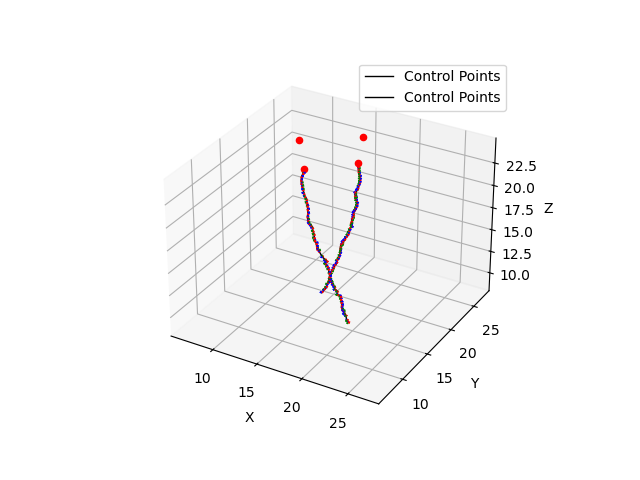

In [62]:
build.get_start_and_end()
start = build.start[0]
end = build.end[0]
start_increment = start + np.array([0.5,0,3]) 
end_increment = end + np.array([-0.5,0,3])
center_of_mass = (start+end)/2
center_of_mass += np.array([0,0,1]) * 20
center_of_mass_left  = center_of_mass + np.array([4,0,-2])
center_of_mass_right  = center_of_mass + np.array([-4,0,-2])

control_points = np.array([start,start_increment,center_of_mass_left,center_of_mass,center_of_mass_right,end_increment,end])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
build.plot_frames(dna_a,ax)
build.plot_frames(dna_b,ax)   

ax.scatter(start[0],start[1],start[2],c='r')
ax.scatter(end[0],end[1],end[2],c='r')
ax.scatter(center_of_mass[0],center_of_mass[1],center_of_mass[2],c='g')
ax.scatter(center_of_mass_left[0],center_of_mass_left[1],center_of_mass_left[2],c='b')
ax.scatter(center_of_mass_right[0],center_of_mass_right[1],center_of_mass_right[2],c='b')
ax.scatter(start_increment[0],start_increment[1],start_increment[2],c='r')
ax.scatter(end_increment[0],end_increment[1],end_increment[2],c='r')

In [63]:
# build.get_start_and_end()
# start = build.start[0]
# end = build.end[0]
# middle_b = np.array([3,17,-2])*1.5
# middle_a = np.array([3,12,-1.8])*1.5
# control_points
build.connect(control_points=control_points)


Optimal BP: 26, Twist Difference per BP: 0.176 degrees
f [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242]
c 243
a 54
b 53
cycle 0: 
34 moves initated
E = 2524.53642871974 kT
E = 1272.0830048633266 kT
E = 1216.8853948846133 kT
E = 1204.8735750887383 kT
E = 1197.7003308757742 kT
E = 1195.1149413394946 kT
E = 1186.599892258558 kT
E = 1173.113817068864 kT
E = 1177.1572296817194 kT
34 moves initated
TTACACCACTCTGGAGATACGACAACTGATAAGCTAGGCACATTCCCTTCGTTTGCTTACCATGATGAATAAACCCGTTGTGGAAGAATCTACATATGAAGGGTGCTGAGCGTTGACGACGCCTTATATCAGCAGAGTGCAAGAACTTAACATCGCTCGGGATTCCAAATGACTACCACCCTAGTTCG

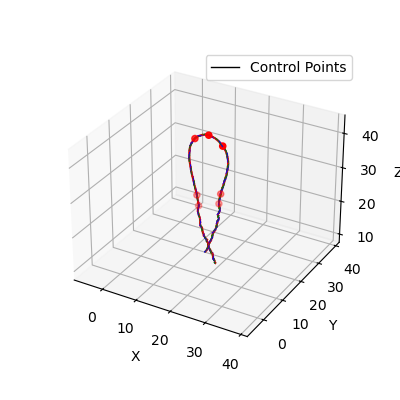

In [64]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
build.plot_frames(build.spline_C_raw, ax)
ax.scatter(*build.control_points_C.T, c='r')

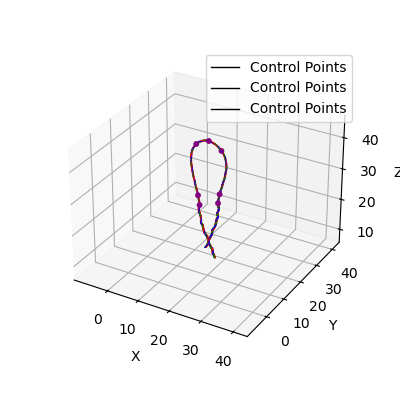

In [65]:
%matplotlib ipympl

build.start, build.end
points = build.control_points_C

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
build.plot_frames(dna_a, ax)
build.plot_frames(dna_b, ax)
xyz = traj.xyz[0]
#ax.scatter(xyz[:,0],xyz[:,1],xyz[:,2],color='black',s=1,alpha=0.1)
ax.scatter(points[:,0],points[:,1],points[:,2],color='purple',s=10,alpha=1)
build.plot_frames(build.spline_C_raw, ax)

In [66]:
view = nv.show_mdtraj(build.get_MC_traj())  
view

NGLWidget(max_frame=175)

In [67]:
protein = traj.atom_slice(traj.top.select('protein'))
dna = build.get_traj()
new_traj = dna.stack(protein)   

view = nv.show_mdtraj(new_traj)
view.clear()
view.add_representation('licorice')
view

NGLWidget()

In [68]:
new_traj.save('other_thing.pdb')